# Point Charges and Electric Fields
#### Zain Naqavi

This code will plot visual representations of the electric potential and electric field of point charges.
$$$$
Overview:
* Single point charge
* Electric dipole
* Three charges in a line
* Quadrupole charge arrangement

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

## Theory
The electric potential $V$ due to a point charge $Q$ is given by:
$$
V = \frac{Q}{4\pi\varepsilon_0 r}
$$
where $r = |\mathbf{r}|$ is the distance between the point at which the potential is measured and the position of the charge.

The electric field $\mathbf{E}$ at position $\mathbf{r}$ on the grid is given by:
$$
\mathbf{E}(\mathbf{r}) = \frac{1}{4 \pi \varepsilon_0} \sum_i Q_i \frac{\mathbf{r_i}}{|\mathbf{r}_i|^3}
$$
where $\mathbf{r_i}$ is the vector from the $i^{th}$ point charge to position $\mathbf{r}$.

The following is in units where $1/(4\pi\varepsilon_0) = 1$.

In [2]:
def potential(x, y, qpos, q):
    """
    Calculates and returns the electric potential, V, for a point charge at position qpos in terms of x and y.
    Input: x, y  (coordinates), qpos (position of charge), q (charge)
    Output: V  (electric potential)
    """
    V = q / np.sqrt((x - qpos[0])**2 + (y - qpos[1])**2)
    return V

In [3]:
def Epoint(x, y, qpos, q):
    """
    Calculates the electric field due to a point charge at qpos.
    Input: q (charge), qpos (position of charge), x, y  (coordinates)  
    Output: Ex, Ey  (electric field)
    """
    Ex = q * (x - qpos[0]) / (np.sqrt( (x - qpos[0])**2 + (y - qpos[1])**2 )**3)
    Ey = q * (y - qpos[1]) / (np.sqrt( (x - qpos[0])**2 + (y - qpos[1])**2 )**3)
    return Ex, Ey

In [4]:
# Create 2d grid of x, y
gridsize = 60j   # complex number to include final point
y, x = np.mgrid[-10:10:gridsize, -10:10:gridsize]

ncontours = 30   # number of equally spaced contour lines to plot

### Point charge

<IPython.core.display.Javascript object>


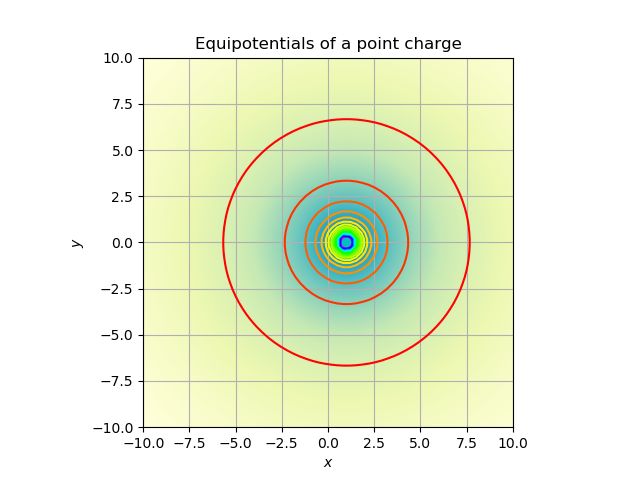

In [5]:
qpos = [1,0]   # point charge at position x, y
q = 1          # charge is positive with magnitude 1

V = potential(x, y, qpos, q)     # calculate matrix of electric potentials
Ex, Ey = Epoint(x, y, qpos, q)   # calculate the electric vector field

# Plot
plt.figure()

# plot the variable V on the grid defined by x and y, using ncontours contour lines
plt.contour(x, y, V, ncontours, cmap = plt.cm.gist_rainbow)

# density plot
plt.imshow(np.log(V), interpolation = 'bilinear', origin = 'lower', cmap = plt.cm.YlGnBu, extent = (-10,10,-10,10))

# plot a small cyan circle at the position of the charge
plt.plot(qpos[0], qpos[1], "co")

plt.grid()
plt.axis('scaled')
plt.axis([-10,10,-10,10])

plt.title("Equipotentials of a point charge")
plt.xlabel("$x$")
plt.ylabel("$y$");

### Electric dipole

<IPython.core.display.Javascript object>


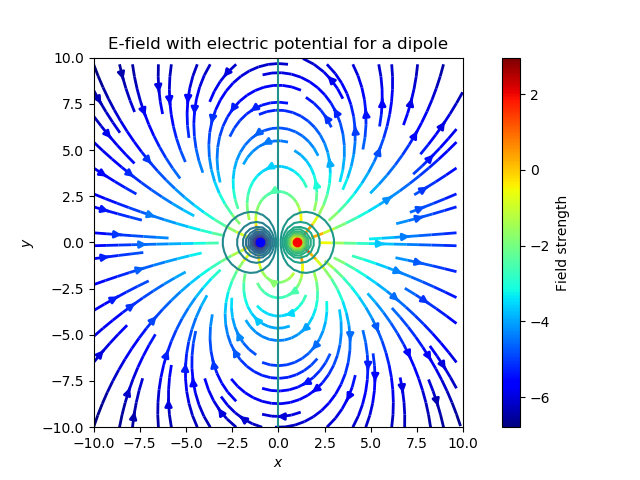

In [6]:
# Adding a negative charge
qpos_2 = [-1,0] # point charge at position x, y
q_2 = -1        # charge is negative, magnitude 1

V_2 = potential(x, y, qpos_2, q_2)     # calculates whole grid/matrix of electric potentials for the negative charge
Ex_2, Ey_2 = Epoint(x, y, qpos_2, q_2) # calculate the electric field for the negative charge

# Combine potentials and electric fields of system
V_tot = V + V_2
Ex_tot = Ex + Ex_2
Ey_tot = Ey + Ey_2
magnitude = np.sqrt(Ex_tot**2 + Ey_tot**2)   # magnitude of the electric field

# Plot Electric field with contour lines
plt.figure()

plt.streamplot(x,y,Ex_tot,Ey_tot,color=np.log(magnitude), linewidth=2, cmap=plt.cm.jet)
plt.colorbar().set_label("Field strength")   # use the streamplot values for the colorbar
plt.contour(x,y,V_tot,ncontours)             # plot the contour lines on top of the stream lines

plt.plot(qpos[0],qpos[1],"ro")       # small red circle at position of the +ve charge
plt.plot(qpos_2[0],qpos_2[1],"bo")   # small blue circle at position of the -ve charge

plt.axis('scaled')          # aspect ratio 1:1
plt.axis([-10,10,-10,10])   # specify xlim, ylim
plt.title("E-field with electric potential for a dipole")
plt.xlabel("$x$")
plt.ylabel("$y$");

The above plot shows the combined electric field and potential contour lines of two oppositely charged point charges, where the positive charge is represented by a red point and the negative charge is represented by a blue point. The elecric fields show an attraction between the positive and negative charges. The electric potential show symmetry about the center point of the dipole. The plane perpendicular to the line between the charges at the midpoint is an equipotential plane with potential zero.

### Three charges in a line

<IPython.core.display.Javascript object>


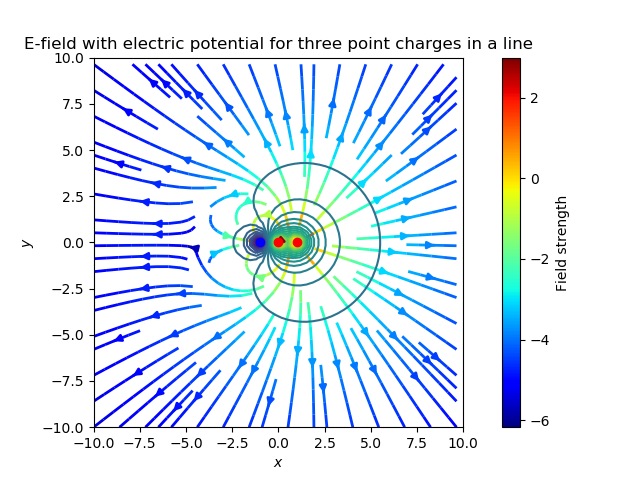

In [7]:
# Adding a third charge
qpos_3 = [0,0] # point charge at position x, y
q_3 = 1        # charge is positive, magnitude 1

V_3 = potential(x, y, qpos_3, q_3)     # calculates whole grid/matrix of electric potentials for the negative charge
Ex_3, Ey_3 = Epoint(x, y, qpos_3, q_3) # calculate the electric field for the negative charge

# Combine potentials and electric fields of system
V_tot = V + V_2 + V_3
Ex_tot = Ex + Ex_2 + Ex_3
Ey_tot = Ey + Ey_2 + Ey_3
magnitude = np.sqrt(Ex_tot**2 + Ey_tot**2)   # magnitude of the electric field

# Plot Electric field with contour lines
plt.figure()

plt.streamplot(x,y,Ex_tot,Ey_tot,color=np.log(magnitude), linewidth=2, cmap=plt.cm.jet)
plt.colorbar().set_label("Field strength")   # use the streamplot values for the colorbar
plt.contour(x,y,V_tot,ncontours)             # plot the contour lines on top of the stream lines

plt.plot(qpos[0],qpos[1],"ro")       # small red circle at position of the +ve charge
plt.plot(qpos_2[0],qpos_2[1],"bo")   # small blue circle at position of the -ve charge
plt.plot(qpos_3[0],qpos_3[1],"ro")   # small red circle at position of the +ve charge

plt.axis('scaled')          # aspect ratio 1:1
plt.axis([-10,10,-10,10])   # specify xlim, ylim
plt.title("E-field with electric potential for three point charges in a line")
plt.xlabel("$x$")
plt.ylabel("$y$");

The above plot shows the combined electric field and potential contour lines of three point charges of equal magnitude in a line, where the positive charges are represented by a red point and the negative charge is represented by a blue point. The elecric fields show an attraction between the positive and negative charges whilst the two positive charges repel eachother. The electric potential shows a pattern similar to a dipole but the two positive charges combine to form a potential similar to a single point charge with twice their magnitude.

### Quadrupole charge arrangement

<IPython.core.display.Javascript object>


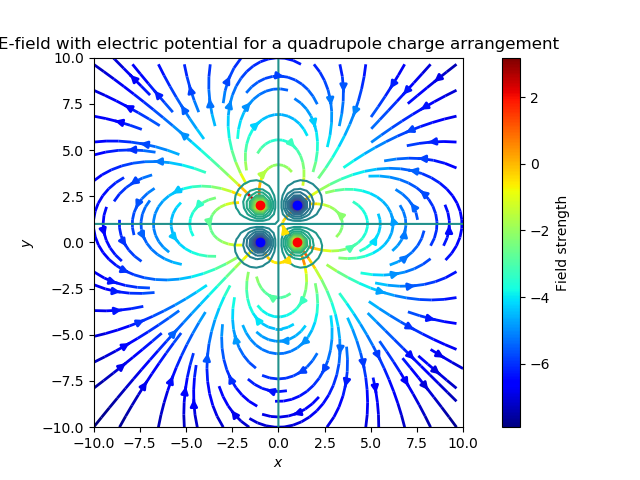

In [8]:
# Adding two charges for quadrupole arrangement
qpos_3 = [-1,2] # point charge at position x, y
q_3 = 1         # charge is positive, magnitude 1
qpos_4 = [1,2]  # point charge at position x, y
q_4 = -1        # charge is negative, magnitude 1

V_3 = potential(x, y, qpos_3, q_3)     # calculates whole grid/matrix of electric potentials for the third charge
Ex_3, Ey_3 = Epoint(x, y, qpos_3, q_3) # calculate the electric field for the third charge
V_4 = potential(x, y, qpos_4, q_4)     # calculates whole grid/matrix of electric potentials for the fourth charge
Ex_4, Ey_4 = Epoint(x, y, qpos_4, q_4) # calculate the electric field for the fourth charge

# Combine potentials and electric fields of system
V_tot = V + V_2 + V_3 + V_4
Ex_tot = Ex + Ex_2 + Ex_3 + Ex_4
Ey_tot = Ey + Ey_2 + Ey_3 + Ey_4
magnitude = np.sqrt(Ex_tot**2 + Ey_tot**2)   # magnitude of the electric field

# Plot Electric field with contour lines
plt.figure()

plt.streamplot(x,y,Ex_tot,Ey_tot,color=np.log(magnitude), linewidth=2, cmap=plt.cm.jet)
plt.colorbar().set_label("Field strength")   # use the streamplot values for the colorbar
plt.contour(x,y,V_tot,ncontours)             # plot the contour lines on top of the stream lines

plt.plot(qpos[0],qpos[1],"ro")     # small red circle at position of the first charge
plt.plot(qpos_2[0],qpos_2[1],"bo") # small blue circle at position of the second charge
plt.plot(qpos_3[0],qpos_3[1],"ro") # small red circle at position of the third charge
plt.plot(qpos_4[0],qpos_4[1],"bo") # small blue circle at position of the fourth charge

plt.axis('scaled')             # aspect ratio 1:1
plt.axis([-10,10,-10,10])      # specify xlim, ylim
plt.title("E-field with electric potential for a quadrupole charge arrangement")
plt.xlabel("$x$")
plt.ylabel("$y$");

The above plot shows the combined electric field and potential contour lines of a quadrupole charge arrangement with charges of equal magnitude, where the positive charges are represented by a red point and the negative charges are represented by a blue point. The elecric fields show an attraction between like charges whilst unlike charges repel eachother to create a symmetrical field. The electric potential shows symmetry about the centre of the quadrupole arrangement.